# Закономерности нескольких числовых переменных

Для изучения данного вопроса создан набор данных housing_sample.csv

In [1]:
import pandas as pd

housing = pd.read_csv('./files/housing_sample.csv')

print(housing.head())

   price       type  sqfeet  beds  baths      lat      long
0    615  apartment     364     0    1.0  35.1653 -101.8840
1   1346  apartment     816     1    1.0  32.9865  -96.6860
2    900  apartment     500     1    1.0  30.2355  -97.7292
3    650  apartment     700     1    1.0  26.1923  -98.2657
4   1330  apartment    1040     2    2.0  30.6380  -96.2940


Один из ярких примеров взаимоотношения двух числовых переменных является точечных график (scatter plot)

Для создания подобного графика используется метод библиотеки pyplot scatter()

Данный метод принимает два значения
- значение по оси Х
- значение по оси Y

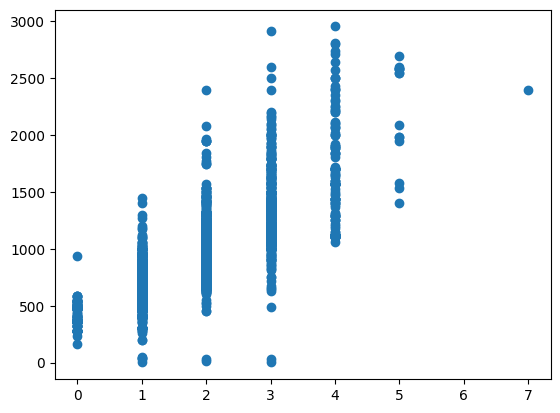

In [2]:
import matplotlib.pyplot as plt

plt.scatter(x=housing.beds, y=housing.sqfeet)
plt.show()
plt.close()

## Исследование ковариации

Ковариация это итоговое значение статистики которое описывает силу линейного взаимоотношения.

Ковариация может принимать значения от -inf до +inf

Положительное значение ковариации говорит нам о том что чем выше один показатель тем выше и другой.

Отрицательно говорит об обратном - чем выше один показатель тем ниже другой.

Для того чтобы рассчитать ковариацию используется метод *cov()* из библиотеки **numpy**

Результатом данного метода будет вложенный список состоящий из двух столбцой и колонок (по 2 элемента в каждом), значением ковариации будет то которое повторяется дважды.

In [4]:
# давайте рассчитаем значение ковариации для нашего набора
import numpy as np
# для более корректного отображения результатов расчета применим некоторые опции
np.set_printoptions(suppress=True, precision=1)

cov_mat_sqfeet_beds = np.cov(housing.sqfeet, housing.beds)

print(cov_mat_sqfeet_beds)
# получается результатом наших вычислений является 228.2

[[110669.     228.2]
 [   228.2      0.7]]


## Исследование корреляции

По мимо ковариации существует производная от него коэффициент корреляции

Который может принимать значения от -1 до +1 и также как и ковариация знак перед значение обозначает тоже самое.

И соответственно значение становится более понятным для интпретации.

Чем ближе значение корреляции к 1 тем сильнее взаимосвязь

Чем ближе значение к 0 тем слабее взаимосвязь либо взаимосвязь отсутствует вовсе

Для того чтобы получить значение корреляции испольузется метод *pearsonr* библиотеки **scipy.stats**

Данный метод возвращает два значения 
- corr_price_sqfeet - значение корреляции
- p - вероятность

In [5]:
# рассчитаем значение корреляции для наших данных
from scipy.stats import pearsonr

correlation, p = pearsonr(housing.beds, housing.sqfeet)

print(correlation)

0.8060022524416222


С коэффиентами корреляции и ковариации следует быть осторожным так как они использутся для выявления силы взаимодействия при линейном взаимоотношении в случае не линейной взаимосвязи корреляци буде приближенная к 0 но явная зависимость будет прослеживаться на точечном графике.

In [6]:
# для примера рассмотрим набор данных sleep_performance.csv
sleep = pd.read_csv('./files/sleep_performance.csv')

print(sleep.head())

   hours_sleep  performance
0          7.3          9.3
1          8.3          9.9
2          7.1          8.9
3          8.4          9.9
4          5.7          5.0


In [8]:
# рассчитаем его коэффициент корреляци и ковариации
print('Covariation', np.cov(sleep.hours_sleep, sleep.performance)[0][-1])
print('Correlation', pearsonr(sleep.hours_sleep, sleep.performance)[0])

Covariation 0.4676979591836736
Correlation 0.28149781890494124


Два показателя очень малы чтобы говорить о взаимосвязи между значениями

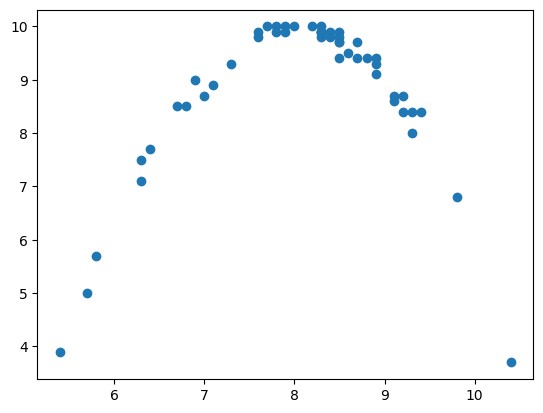

In [9]:
# давайте посмотрим на график
plt.scatter(x=sleep.hours_sleep, y=sleep.performance)
plt.show()
plt.close()

Но на графике явно видна не линейная зависимость что и требовалось доказать